In [1]:
include("load_save.jl")
dataset_name = String(split(split(@__FILE__, '\\')[end], '.')[1])
R, X, Y, L, F, Y, PY = load_big_dataset(dataset_name);

Dataset : AB_B


Sample : 14483
Variable : 42


In [2]:
using Pandas, Seaborn

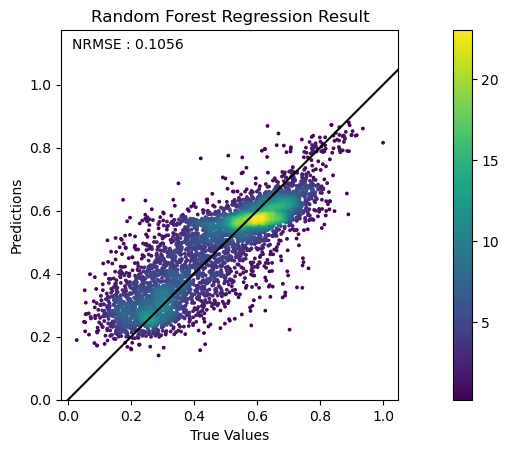

NRMSE : 0.105563


In [3]:
view_result(PY, Y, data_state);

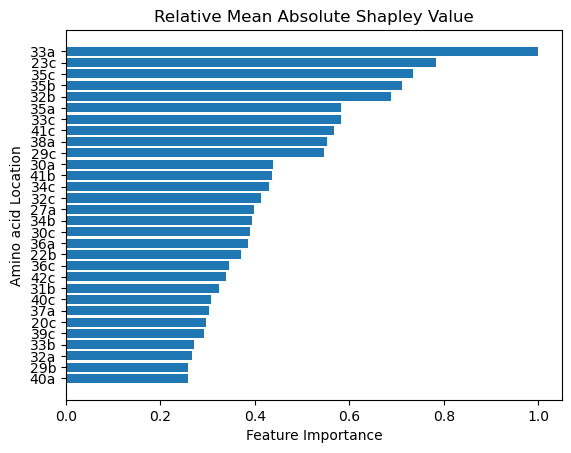

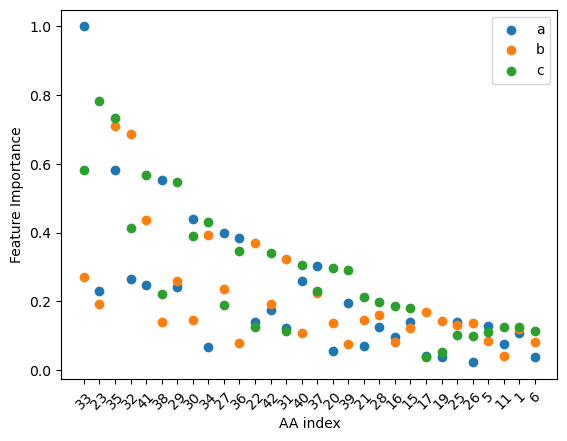

In [4]:
view_importance(R, L, F, show_number=30);

In [3]:
gtag = Vector{String}()
tag = Vector{String}()
NL = Vector{String}()
gf = Vector{Float64}()
f = Vector{Float64}()

for (loc, fe) in zip(L, F)
    nloc = parse(Int, loc[1:end-1])
    if nloc ∈ [1, 3, 7, 11, 22, 17, 42]
        push!(gtag, "Gatekeeper")
        push!(NL, loc)
        push!(gf, fe)
    elseif nloc ≤ 26
        push!(tag, "N-terminus")
        push!(NL, loc)
        push!(f, fe)
    else
        push!(tag, "C-terminus")
        push!(NL, "*" * loc)
        push!(f, fe)
    end
end
data = Pandas.DataFrame(Dict("Feature Importance" => f, "AA type" => tag))
gdata = Pandas.DataFrame(Dict("Feature Importance" => gf, "AA type" => gtag));

In [5]:
test_top5(R, F, NL)

Location : 23c
D (-78.00) : 0.9544
E (-115.00) : 0.0126
G (-13.00) : 0.0106
V (108.00) : 0.0095
N (-84.00) : 0.0071
Y (11.00) : 0.0046
H (-55.00) : 0.0005
A (51.00) : 0.0003
C (137.00) : 0.0001
F (108.00) : 0.0001
K (-205.00) : 0.0001
I (106.00) : 0.0001
S (-26.00) : 0.0001



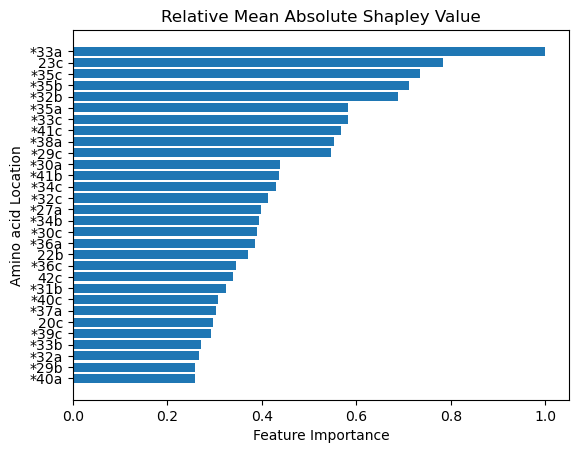

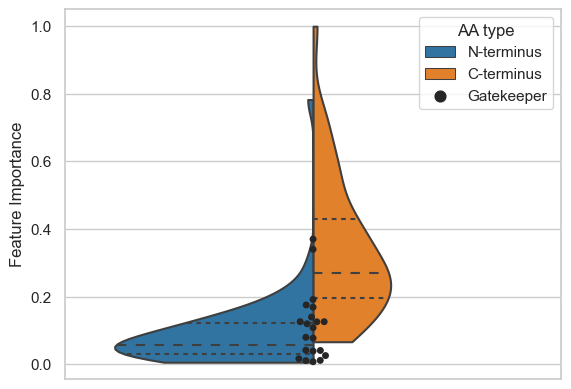

In [6]:
view_importance(R, NL, F, show_number=30)
data["all"] = ""
gdata["all"] = ""
set_theme(style="whitegrid", palette="tab10")
violinplot(x="all", y="Feature Importance", hue="AA type", inner="quartile", data=data, split=true, bw=0.4, cut=0)
swarmplot(x="all", y="Feature Importance", hue="AA type", color="white", data=gdata)
xlabel("")
display(gcf())
close("all")
matplotlib.rc_file_defaults()